<font color="brown" size="6" style="font-family:sans-serif" bold=True>Used Vehicle Price Prediction</font>

# Introduction

## Business Overview

- <p>A used car or a secondhand car, is a vehicle that previously had one or more retail owners. The value of a car drops right from the moment it is bought and the depreciation continues with each passing year.</p> 
- <p>In fact, in the first year itself, the value of a car decreases by 20 percent of its base price.</p>
- <p>Used cars are sold through a variety of outlets, including franchise and independent car dealers, rental car companies, buy here pay here dealerships, leasing offices, auctions, and private party sales.</p>

## Problem Statement

- <b>Building a machine learning model to predict the price of a used vehicle or a secondhand car based on available features.</b>

## Stakeholder

- <b>Head of The Product Management Department</b>
- Head of Marketing Department
- Head of Dealers

## Data Science Metric

- <b>Mean Absolute Error (MAE)</b>
- <b>Root Mean Square Error (RMSE)</b>
- <b>R-Sqaured Score(R2)</b>

# Loading Data

## Loading libraries

In [1]:
# Load Libraries

import pandas as pd #dataframe
import numpy as np #mathematical computations
import matplotlib.pyplot as plt #visualization
import seaborn as sns #visualization
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import json #exporting columns
import pickle #saving the model
from sklearn.linear_model import LinearRegression #Linear Regression
from sklearn.preprocessing import LabelEncoder #Encoding technique
from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn.linear_model import Lasso #Lasso Regression
from sklearn.linear_model import Ridge #Ridge Regression
from sklearn.tree import DecisionTreeRegressor #Decision Tree Regression
from sklearn.ensemble import RandomForestRegressor #Random Forest Regression
from sklearn.model_selection import train_test_split #Splitting the dataset into training and testing
from sklearn.model_selection import cross_val_score #Score cross validation
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV #Hyper parameter tuning
from sklearn.feature_selection import RFE,SelectKBest
from sklearn.feature_selection import f_classif, chi2
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import pickle
from warnings import simplefilter #Filtering warnings

print('Setup Completed.')

Setup Completed.


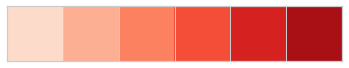

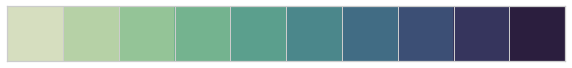

In [2]:
from palettable.colorbrewer.diverging import *

sns.set(style='whitegrid', palette="Spectral_r")
cb_pal = sns.cubehelix_palette(10, start=0.5, rot=-.75)
cpal = sns.color_palette("Reds")
sns.palplot(cpal)
sns.palplot(cb_pal)

## Load Dataset

In [3]:
# Load train data

train = pd.read_csv('./Data/Car-data-train.csv')

print('Shape of the data:', train.shape)

Shape of the data: (8128, 12)


In [4]:
train.head().T

,0,1,2,3,4
name,Maruti Swift Dzire VDI,Skoda Rapid 1.5 TDI Ambition,Honda City 2017-2020 EXi,Hyundai i20 Sportz Diesel,Maruti Swift VXI BSIII
year,2014,2014,2006,2010,2007
selling_price,450000,370000,158000,225000,130000
km_driven,145500,120000,140000,127000,120000
fuel,Diesel,Diesel,Petrol,Diesel,Petrol
seller_type,Individual,Individual,Individual,Individual,Individual
transmission,Manual,Manual,Manual,Manual,Manual
owner,First Owner,Second Owner,Third Owner,First Owner,First Owner
mileage,23.4 kmpl,21.14 kmpl,17.7 kmpl,23.0 kmpl,16.1 kmpl
engine,1248 CC,1498 CC,1497 CC,1396 CC,1298 CC


# Data Preprocessing 

## Statistics of Data

In [5]:
train.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


## Categorical Vs Numerical features

In [6]:
# Cat Vs Num column
cat_col = train.select_dtypes(exclude=np.number).columns
num_col = train.select_dtypes(include=np.number).columns

In [7]:
# Display categorical and numerical columns
print('Total Categorical Coulmns : ', len(cat_col), "\n")
print("Categorical columns :", list(cat_col), "\n")
print('Total Numerical Coulmns : ', len(num_col), "\n")
print("Numerical columns :", list(num_col), "\n")

Total Categorical Coulmns :  8 

Categorical columns : ['name', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power'] 

Total Numerical Coulmns :  4 

Numerical columns : ['year', 'selling_price', 'km_driven', 'seats'] 



## Unique values in categorical columns

In [8]:
# Check all the unique values from each of the columns

for col in cat_col:
    print('Number of unique values for column', col, len(train[col].unique()))
    print('Unique values of column', col, train[col].unique(), '\n')

Number of unique values for column name 2058
Unique values of column name ['Maruti Swift Dzire VDI' 'Skoda Rapid 1.5 TDI Ambition'
 'Honda City 2017-2020 EXi' ... 'Tata Nexon 1.5 Revotorq XT'
 'Ford Freestyle Titanium Plus Diesel BSIV'
 'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV'] 

Number of unique values for column fuel 4
Unique values of column fuel ['Diesel' 'Petrol' 'LPG' 'CNG'] 

Number of unique values for column seller_type 3
Unique values of column seller_type ['Individual' 'Dealer' 'Trustmark Dealer'] 

Number of unique values for column transmission 2
Unique values of column transmission ['Manual' 'Automatic'] 

Number of unique values for column owner 5
Unique values of column owner ['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car'] 

Number of unique values for column mileage 394
Unique values of column mileage ['23.4 kmpl' '21.14 kmpl' '17.7 kmpl' '23.0 kmpl' '16.1 kmpl' '20.14 kmpl'
 '17.3 km/kg' '23.59 kmpl' '20.0 kmpl' '19.01 kmpl'

## Null/Missing value analysis

In [9]:
# Check null values from each of the columns

train.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
dtype: int64

In [10]:
train[(train['mileage'].isnull() & train['engine'].isnull() & train['seats'].isnull())].count()

name             221
year             221
selling_price    221
km_driven        221
fuel             221
seller_type      221
transmission     221
owner            221
mileage            0
engine             0
max_power          6
seats              0
dtype: int64

<b>Insight:</b> <br>
- Since total 221 rows having null values for all 5 columns, so we can drop these columns.

 ## Drop null value records in data

In [11]:
# Drop null values
train.dropna(inplace=True)

print('Shape of the data:', train.shape)

Shape of the data: (7907, 12)


In [12]:
train.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

## Converting Engine, Max power and Mileage data from categorical to numerical

In [13]:
# Convert Categorical column to numerical column

def remove_units(df_unit):
    '''
    Removing units from the value of car data to convert categorical columns to numerical columns
    '''
    unit_cols = ['engine', 'max_power', 'mileage']
    df_unit['engine'] = df_unit['engine'].apply(lambda x:x.replace(' CC', ''))
    df_unit['max_power'] = df_unit['max_power'].apply(lambda x:x.replace(' bhp', ''))
    df_unit['mileage'] = df_unit['mileage'].apply(lambda x:x.replace(' kmpl', ''))
    df_unit['mileage'] = df_unit['mileage'].apply(lambda x:x.replace(' km/kg', ''))
    
    for unit in unit_cols:
        df_unit[unit] = df_unit[unit].apply(lambda x:float(x))

In [14]:
# Calling remove_units function

remove_units(train)
train[['engine', 'max_power', 'mileage']].head()

,engine,max_power,mileage
0,1248.0,74.00,23.40
1,1498.0,103.52,21.14
2,1497.0,78.00,17.70
3,1396.0,90.00,23.00
4,1298.0,88.20,16.10


In [15]:
# Cat Vs Num column
cat_col = train.select_dtypes(exclude=np.number).columns
num_col = train.select_dtypes(include=np.number).columns

In [16]:
# Display categorical and numerical columns
print('Total Categorical Coulmns : ', len(cat_col), "\n")
print("Categorical columns :", list(cat_col), "\n")
print('Total Numerical Coulmns : ', len(num_col), "\n")
print("Numerical columns :", list(num_col), "\n")

Total Categorical Coulmns :  5 

Categorical columns : ['name', 'fuel', 'seller_type', 'transmission', 'owner'] 

Total Numerical Coulmns :  7 

Numerical columns : ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats'] 



In [17]:
# Copying the preprocessed data
df_pre = train.copy()

# Explanatory Data Analysis

## Selling price Vs Year Scatter plot

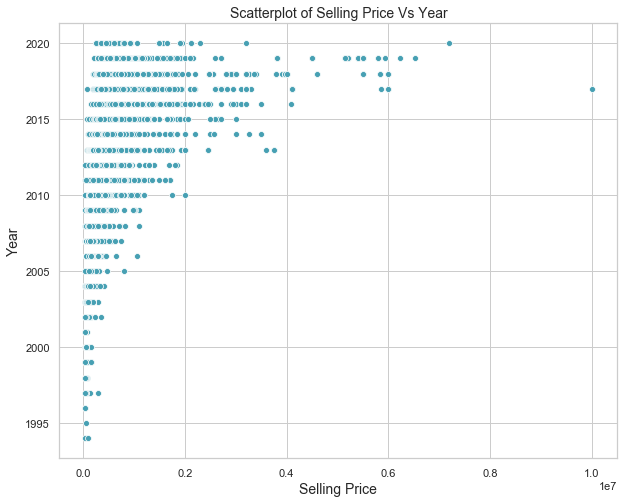

In [18]:
# Selling Price Vs Year

plt.figure(figsize=(10,8))
sns.scatterplot('selling_price', 'year', data=train)

plt.xlabel('Selling Price', fontsize=14)
plt.ylabel('Year', fontsize=14)
plt.title("Scatterplot of Selling Price Vs Year", fontsize=14)
plt.show() 

<b>Insight:</b> <br>
- Selling prices within the year from 1995 to 2000 are comparatively lower.
- Selling prices within the year from 2015 to 2020 are comparatively much higher.

## Top 10 Vehicles having highest total selling price

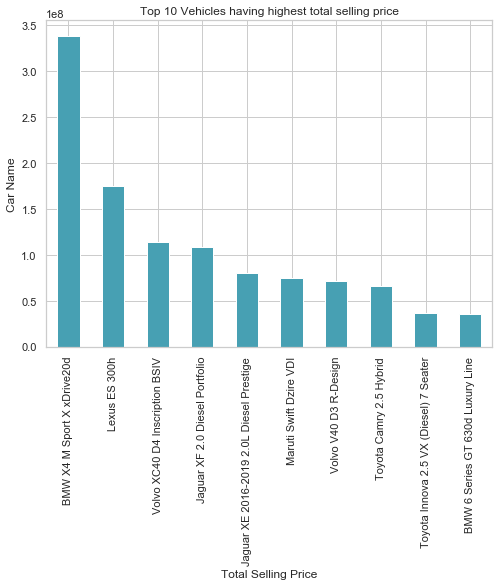

In [19]:
# Highest total selling price

plt.figure(figsize=(8,6))
train.groupby('name')['selling_price'].sum().sort_values(ascending=False).iloc[:10].plot(kind='bar')
plt.xlabel('Total Selling Price', fontsize=12)
plt.ylabel('Car Name', fontsize=12)
plt.title("Top 10 Vehicles having highest total selling price", fontsize=12)
plt.show() 

<b>Insight:</b> <br>
- Car model BMW X4 M Sport X xDrive20d having highest total selling price.
- Cars from BMW, Volvo and Jaguar companies having highest total selling price.

## Countplot for categorical columns

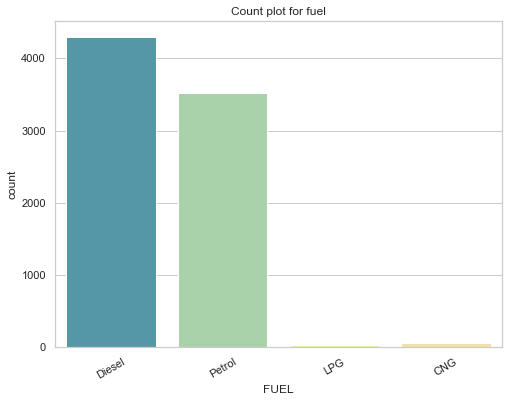

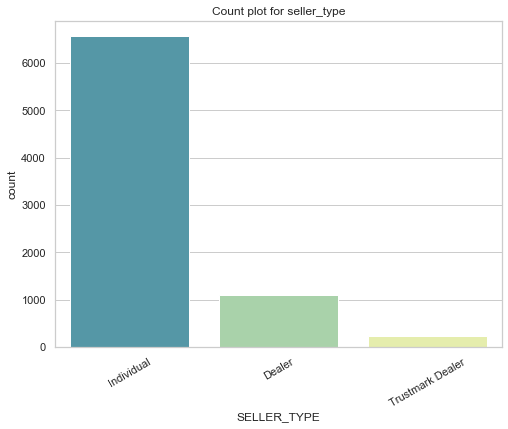

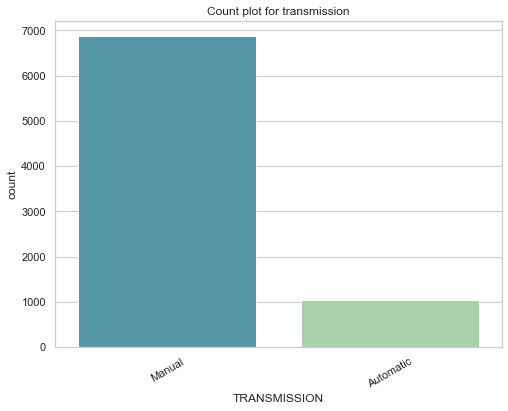

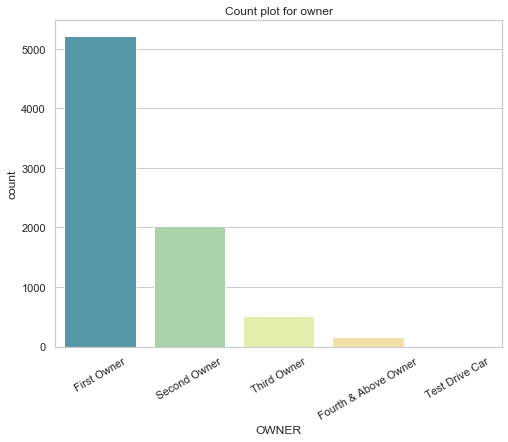

In [20]:
# Countplot for categorical columns
columns = ['fuel', 'seller_type', 'transmission', 'owner']

for col in columns:
    plt.figure(figsize=(8,6))
    sns.countplot(col, data=train)
    plt.xlabel(col.upper(), fontsize=12)
    plt.title("Count plot for "+col, fontsize=12)
    plt.xticks(rotation=30)
plt.show()

<b>Insight:</b> <br>
- Maximum number of vehicles having fuel type is Diesel. While vehicles having fuel type CNG and LPG having lowest count.
- There are higher number of individual seller as compared to other seller type i.e. Dealer or Trustmark Dealer.
- There are more number of manual transmission vehicle as compared to automatic transmission vehicle.
- Maximum number of vehicles having first owner dealer, also there are some test drive car data is present.

## Fuel Type Vs Engine Count Plot

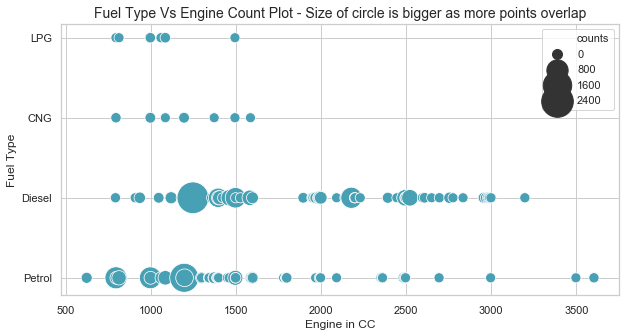

In [21]:
# Fuel Type Vs Engine Count Plot
df_count = train.groupby(['engine', 'fuel']).size().reset_index(name='counts')

plt.figure(figsize=(10,5))
sns.scatterplot('engine', 'fuel', data=df_count, size=df_count.counts*2, sizes=(100,1000))

plt.xlabel('Engine in CC', fontsize=12)
plt.ylabel('Fuel Type', fontsize=12)
plt.title('Fuel Type Vs Engine Count Plot - Size of circle is bigger as more points overlap', fontsize=14)
plt.show()

<b>Insight:</b> <br>
- Vehicles having fuel type Petrol have highest CC engine i.e. more than 3500 CC.
- Fuel type Diesel vehicles having more number of engines under 1500 CC to 1000 CC.
- LPG and CNG fuel type engines are not more than 1500 CC.

## Multivariate plots for numerical data

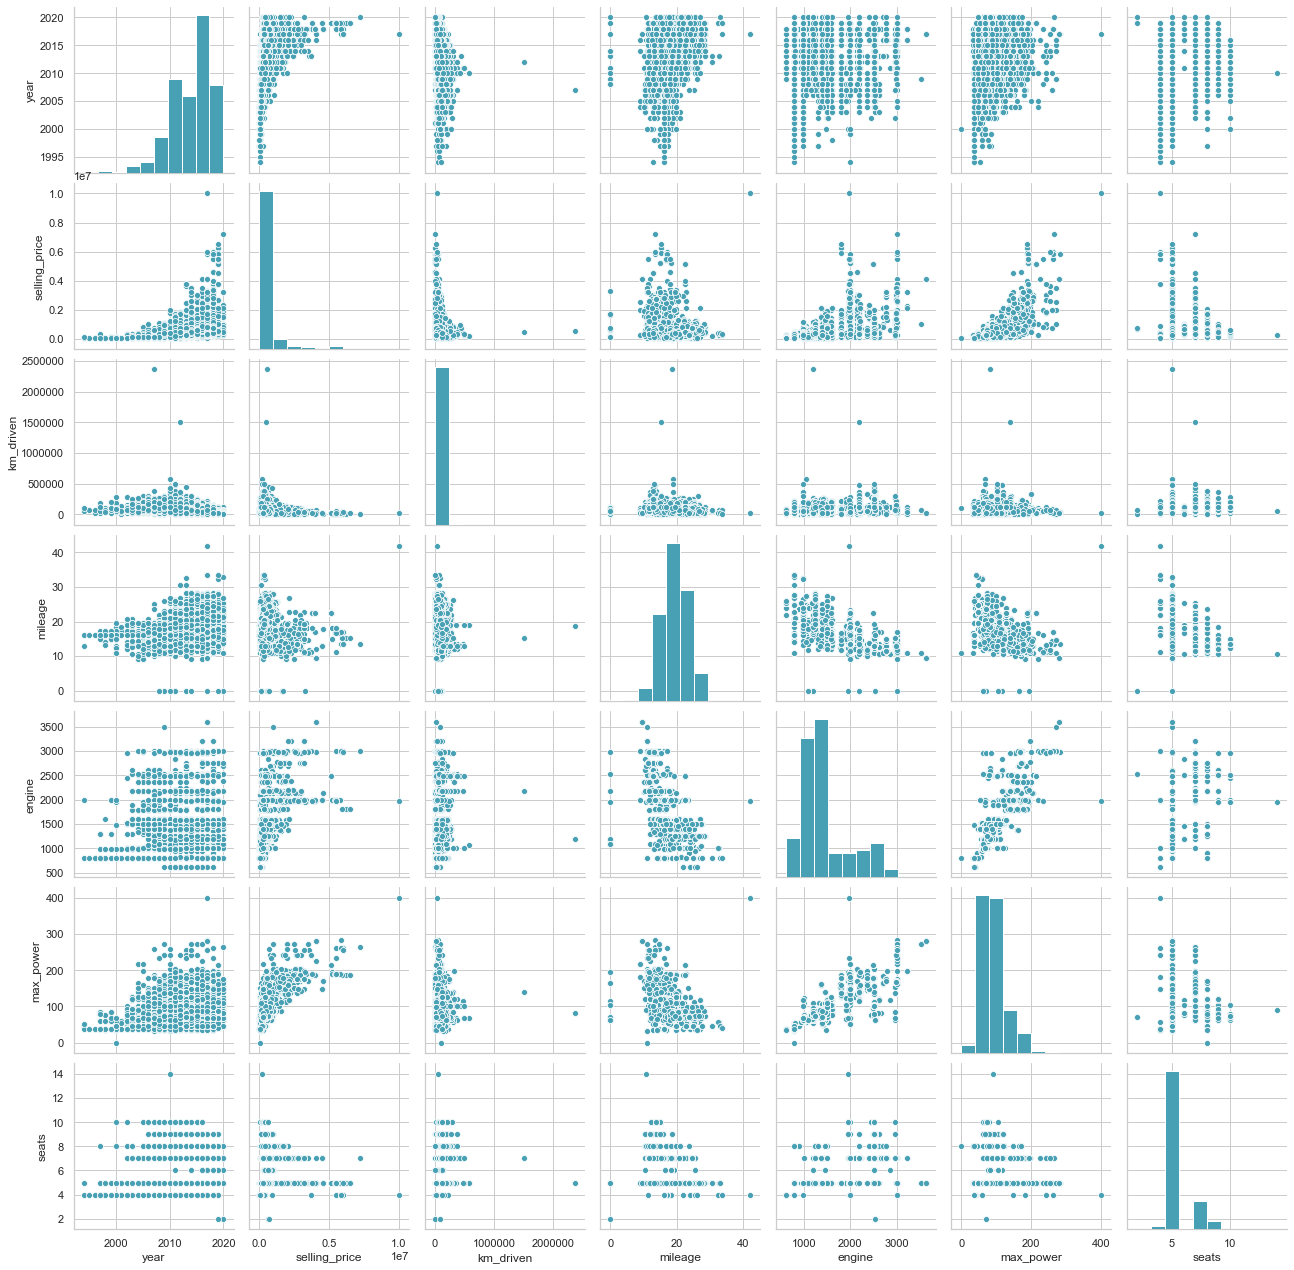

In [22]:
# Multivariate plots for Manual dataframe
sns.pairplot(train)
plt.show()

## Year wise average kilometer driven analysis

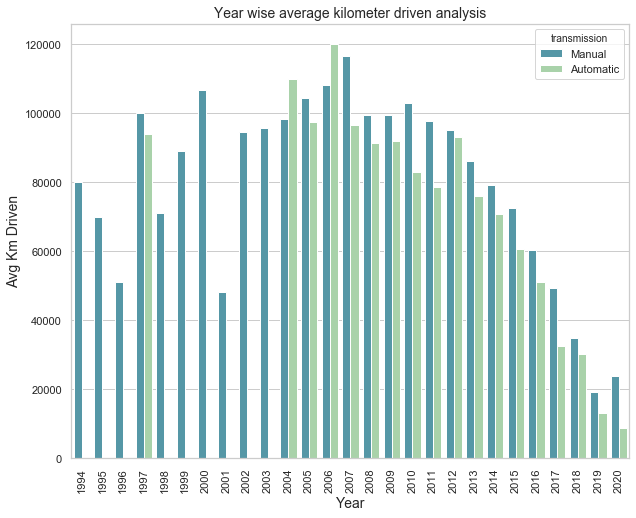

In [23]:
# Year wise average kilometer driven analysis
km_data=train.groupby(['year', 'transmission'])['km_driven'].mean()
km_data = km_data.reset_index(drop=False)

plt.figure(figsize=(10,8))
sns.barplot('year','km_driven', data=km_data, hue='transmission')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Avg Km Driven', fontsize=14)
plt.title("Year wise average kilometer driven analysis", fontsize=14)
plt.xticks(rotation=90)
plt.show()

<b>Insight:</b> <br>
- Till the year of 2004 not much automatic transmission vehicles were available.
- After the year of 2007, there is continuous decrease in manual vehicles usage.

# Feature Engineering

## Numerical features(Outliers)

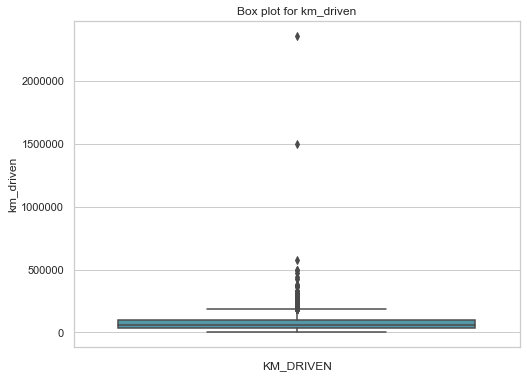

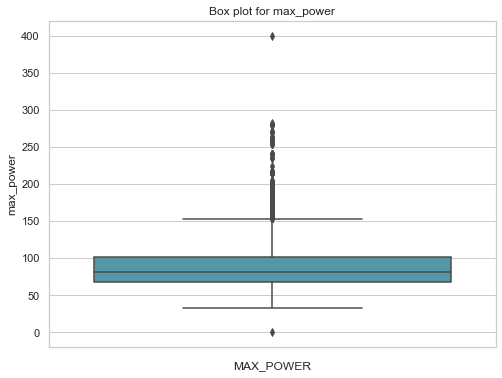

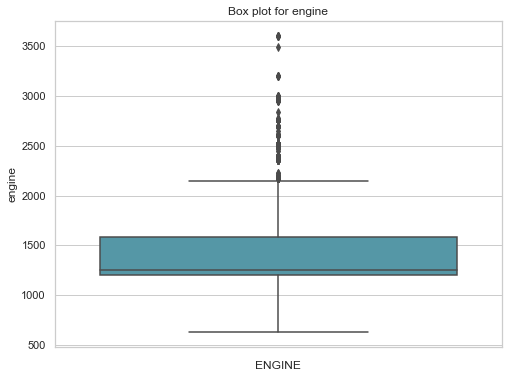

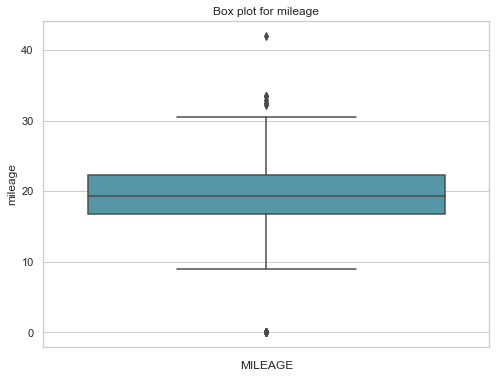

In [24]:
# Boxplot for outliers in numerical features
cols = ['km_driven', 'max_power', 'engine', 'mileage']

for num in cols:
    plt.figure(figsize=(8,6))
    sns.boxplot(y=num, data=train)
    plt.xlabel(num.upper(), fontsize=12)
    plt.title("Box plot for "+num, fontsize=12)
    plt.xticks(rotation=30)
plt.show()

<b>Insight:</b> <br>
- There are not much outliers present in the data, so we are not going to handle outlier here.

## Categorical features

### Approach 1

#### One Hot Encoding

In [25]:
# One hot encoding on selected columns

df_app1 = train.copy()
one_hot_col = ['fuel', 'seller_type', 'transmission']

X_cat = df_app1[one_hot_col]
X_cat.head(2)
X_cat_one_hot_train = pd.get_dummies(X_cat, drop_first=True)

#Merge With original df
cat_proc_columns = X_cat_one_hot_train.columns
for col in cat_proc_columns:
    df_app1[col] = X_cat_one_hot_train[col] 
    
df_app1.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,1,0,0,1,0,1
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,1,0,0,1,0,1


#### Label Encoding

In [26]:
# Label encoding
encoder = LabelEncoder()
df_app1['owner'] = df_app1['owner'].replace({'First Owner':4, 'Second Owner':3, 'Third Owner':2, 'Fourth & Above Owner':1, 'Test Drive Car':0})

In [27]:
# Droping remaining categorical columns

df_app1.drop(columns='name', axis=1, inplace=True)
df_app1.drop(one_hot_col, axis=1, inplace=True)

df_app1 = df_app1.rename(columns = {'seller_type_Trustmark Dealer':'seller_type_Trustmark_Dealer'})
df_app1.head(2)

,year,selling_price,km_driven,owner,mileage,engine,max_power,seats,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark_Dealer,transmission_Manual
0,2014,450000,145500,4,23.40,1248.0,74.00,5.0,1,0,0,1,0,1
1,2014,370000,120000,3,21.14,1498.0,103.52,5.0,1,0,0,1,0,1


### Approach 2

#### One Hot Encoding

In [28]:
cols = ['fuel', 'seller_type', 'transmission', 'owner']

df_app2 = train.copy()
X_cat = df_app2[cols]
X_cat.head(2)
X_cat_one_hot_train = pd.get_dummies(X_cat, drop_first=True)

#Merge With original df
cat_proc_columns = X_cat_one_hot_train.columns
for col in cat_proc_columns:
    df_app2[col] = X_cat_one_hot_train[col]

In [29]:
# Droping remaining categorical columns

df_app2.drop(cols, axis=1, inplace=True)

In [30]:
# Drop name column

df_app2.drop('name', axis=1, inplace=True)
df_app2.head(2)

,year,selling_price,km_driven,mileage,engine,max_power,seats,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,450000,145500,23.40,1248.0,74.00,5.0,1,0,0,1,0,1,0,0,0,0
1,2014,370000,120000,21.14,1498.0,103.52,5.0,1,0,0,1,0,1,0,1,0,0


# Feature Selection

## Co-relation Matrix

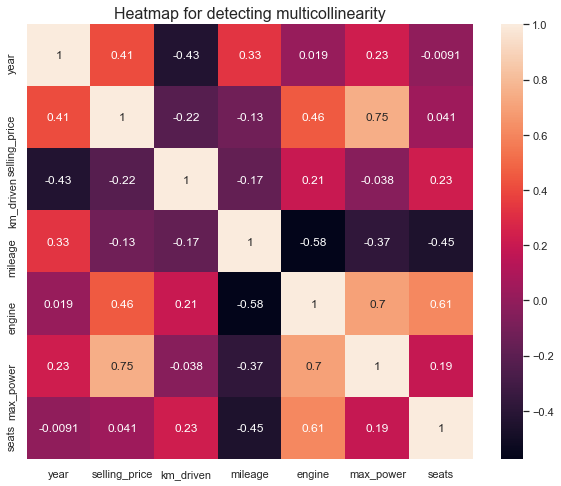

In [31]:
# Apply Co-relation on numerical column

fig = plt.figure(figsize=(10, 8))
sns.heatmap(train[num_col].corr(), annot=True)
plt.title('Heatmap for detecting multicollinearity', fontsize=16)
plt.show()

## CHI-Square Test

In [32]:
# Chi-square test for categorical features

df_chi = train[['fuel', 'seller_type', 'transmission', 'owner']]

X_chi = pd.get_dummies(df_chi, drop_first=True)
y_chi = train['selling_price']
X_chi.shape

(7907, 10)

In [33]:
# Apply Chi2 and fit the random forest model on train data use df dataset
nof_list   = [1, 3, 5, 8, 10]
high_score = 0
nof        = 0

for n in nof_list:
    test = SelectKBest(score_func = chi2 , k = n)
    X_train, X_test, y_train, y_test = train_test_split(X_chi, y_chi, test_size=0.3, random_state = 42)
    
    X_train = test.fit_transform(X_train,y_train)
    X_test = test.transform(X_test)
    
    model = RandomForestRegressor()
    model.fit(X_train,y_train)
    
    print("For no of features=",n,", score=", model.score(X_test,y_test))
    
    if model.score(X_test,y_test) > high_score:
        high_score = model.score(X_test, y_test)
        model_ = model
        nof=n 
    print("High Score is:",high_score, "with features=",nof)

For no of features= 1 , score= 0.028234760271144688
High Score is: 0.028234760271144688 with features= 1
For no of features= 3 , score= 0.029688533957610175
High Score is: 0.029688533957610175 with features= 3
For no of features= 5 , score= 0.0915080578085401
High Score is: 0.0915080578085401 with features= 5
For no of features= 8 , score= 0.15389821754940725
High Score is: 0.15389821754940725 with features= 8
For no of features= 10 , score= 0.615484188983829
High Score is: 0.615484188983829 with features= 10


# Model Building

## Predefined functions

In [34]:
models = {
          'Linear Regression':LinearRegression(),
          'Logistic Regression':LogisticRegression(),
          'Lasso Regression':Lasso(), 
          'Ridge Regression':Ridge(), 
          'Decision Tree Regression': DecisionTreeRegressor(),
          'Random Forest Regression':RandomForestRegressor() 
          }

In [35]:
# functions to calculate metric

def cal_MAE(y_tst, y_predict):
    '''
    calculate and returns mean absolute error
    '''
    return np.round(mean_absolute_error(y_tst, y_predict), 2)

def cal_MSE(y_tst, y_predict):
    '''
    calculate and returns root mean squared error
    '''
    return np.round(np.sqrt(mean_squared_error(y_test, y_predict)), 2)

def cal_r2_score(y_tst, y_predict):
    '''
    calculate and returns R squared score
    '''
    return np.round(r2_score(y_tst, y_predict), 2)

In [36]:
# Model Building

def model_building(model_values, X_data, y_data):
    '''
    calculate and returns MAE, RMSE and R2_Score for all models in a dataframe format
    '''
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, random_state=42, test_size=0.3)
    
    Regressor = []
    MAE_Score = []
    MSE_Score = []
    R2_Score = []
    for name, model in model_values.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        Regressor.append(name)
        MAE_Score.append(cal_MAE(y_test, y_pred))
        MSE_Score.append(cal_MSE(y_test, y_pred))
        R2_Score.append(cal_r2_score(y_test, y_pred))
    
    results = pd.DataFrame({'Model':Regressor, 'MAE Score':MAE_Score, 'RMSE Score':MSE_Score, 'R2 Score':R2_Score})
    print(results)        

## Model Building for Approach 1

In [37]:
X = df_app1.drop(['selling_price'], 1)
y = df_app1['selling_price']

In [38]:
# Call Model building function

model_building(models, X, y)

                      Model  MAE Score  RMSE Score  R2 Score
0         Linear Regression  275585.50   474365.94      0.68
1       Logistic Regression  358350.34   817059.38      0.05
2          Lasso Regression  275582.92   474366.02      0.68
3          Ridge Regression  275514.09   474391.74      0.68
4  Decision Tree Regression   78038.33   158468.54      0.96
5  Random Forest Regression   66381.22   125244.66      0.98


## Model Building for Approach 2

In [39]:
X_pre = df_app2.drop(['selling_price'], 1)
y_pre = df_app2['selling_price']

In [40]:
model_building(models, X_pre, y_pre)

                      Model  MAE Score  RMSE Score  R2 Score
0         Linear Regression  275201.28   467432.17      0.69
1       Logistic Regression  357494.88   816749.64      0.05
2          Lasso Regression  275200.14   467436.25      0.69
3          Ridge Regression  275547.84   468868.06      0.69
4  Decision Tree Regression   76394.02   159281.91      0.96
5  Random Forest Regression   66895.99   125768.18      0.98


<b>Insight:</b> <br>
- In both two approaches Random Forest Regressor having highest R2-Score, so we will take Random Forest Regressor for Hyper parameter tuning.

# Hyper Parameter Tuning

## Grid Search CV

In [41]:
from sklearn.model_selection import GridSearchCV
def grid_search_cv(estimator, parameters):
    grid_search = GridSearchCV(
        estimator = estimator,
        param_grid = parameters,
        scoring = 'r2',
        n_jobs = 10,
        cv = 10,
        verbose=True
    )
    grid_search.fit(X, y)
    return grid_search

In [42]:
#Random Forest GRID SEARCH CV
estimator = RandomForestRegressor(random_state=42)
parameters = {'n_estimators': [10, 50, 100], 
              'max_features': ['log2', 'sqrt'],
              'max_depth': [2,4,6], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,3,5] 
             }
grid_search = grid_search_cv(estimator, parameters)
print(grid_search.best_estimator_)

Fitting 10 folds for each of 162 candidates, totalling 1620 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    8.3s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   15.4s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:   27.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:   46.4s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:  1.2min
[Parallel(n_jobs=10)]: Done 1620 out of 1620 | elapsed:  1.7min finished


RandomForestRegressor(max_depth=6, max_features='log2', random_state=42)


## Random Search CV

In [43]:
random_grid = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}

rf = RandomForestRegressor()

In [44]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X, y)

print(rf_random.best_estimator_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.2min finished


RandomForestRegressor(max_depth=90, n_estimators=180)


## Final result for Hyper parameter tuning

In [52]:
model_building({'Random Forest with GridSearchCV' : RandomForestRegressor(max_depth=6, max_features='log2', min_samples_split=3, random_state=42),
               'Random Forest with RandomizedSearchCV' : RandomForestRegressor(max_depth=90, n_estimators=180)},
               X, y)

                                   Model  MAE Score  RMSE Score  R2 Score
0        Random Forest with GridSearchCV  119305.70   202059.69      0.94
1  Random Forest with RandomizedSearchCV   66129.66   125401.07      0.98


<b>Insight:</b> <br>
- The final selected model is <b>Random Forest Regressor with RandomizedSearchCV</b>.

# Testing and Deployment

## Load test data

In [53]:
# Loading and preprocessing test data

df_test = pd.read_csv('./Data/Car-data-test.csv')

remove_units(df_test)

test = df_test
df_test.head(2)

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,27000,Petrol,Dealer,Manual,First Owner,23.40,2179.0,93.70,5
1,Skoda Rapid 1.5 TDI Ambition,2013,43000,Diesel,Dealer,Manual,First Owner,21.14,2494.0,81.83,5


## Process the test data

In [54]:
# Process test data
one_hot_col = ['fuel', 'seller_type', 'transmission']

X_cat = df_test[one_hot_col]
X_cat_one_hot_test = pd.get_dummies(X_cat, drop_first=True)

#Merge With original df
cat_proc_columns = X_cat_one_hot_test.columns
for col in cat_proc_columns:
    df_test[col] = X_cat_one_hot_test[col] 

encoder = LabelEncoder()
df_test['owner'] = df_test['owner'].replace({'First Owner':4, 'Second Owner':3, 'Third Owner':2, 'Fourth & Above Owner':1, 'Test Drive Car':0})    

# Drop name column
df_test.drop(columns='name', axis=1, inplace=True)
df_test.drop(one_hot_col, axis=1, inplace=True)

df_app1 = df_app1.rename(columns = {'seller_type_Trustmark Dealer':'seller_type_Trustmark_Dealer'})
df_test.head(2)

,year,km_driven,owner,mileage,engine,max_power,seats,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,2014,27000,4,23.40,2179.0,93.70,5,0,0,1,0,0,1
1,2013,43000,4,21.14,2494.0,81.83,5,1,0,0,0,0,1


## Prediction on test data

In [48]:
model

RandomForestRegressor()

In [55]:
# Applying rfe on test data

# Storing the name from the test file
#name = test['name']

algoritm = RandomForestRegressor(max_depth=90, n_estimators=180)
algoritm.fit(X,y)

# Predict on the test data
y_pred_test = algoritm.predict(df_test)

# Create a sample submission file
sample_submission = pd.DataFrame({'Selling Price':y_pred_test})

# Convert the sample submission file into a csv file
sample_submission.to_csv('submission.csv',index=False)

In [56]:
# Saving model to disk

pickle.dump(algoritm, open('model.pkl','wb'))

In [65]:
# Loading model to compare the results

model = pickle.load(open('model.pkl','rb'))
print(model.predict([[2016, 1584.52, 2, 102.2, 1200, 100, 6, 0, 0, 0, 1, 0, 0]]))

[514510.96666667]
